# Домашняя работа к уроку 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Задача 1

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите `M(X)`, `D(X)`.

Определим $X$ как случайную величину, равную числу правильных ответов. Число вопросов $n = 5$, тогда случайная величина принимает следующие значения: $X_1 = 0$, $X_2 = 1$, $X_3 = 2$, $X_4 = 3$, $X_5 = 4$, $X_6 = 5$ (от не угадали ни одного ответа до угадали все ответы). Вероятность угадать правильный вопрос $p = \frac{1}{4}$, так как для каждого вопроса приведено 4 варианта ответа и только один из них правильный.

Воспользуемся __формулой Бернулли__:
$$P(X = k) = C_n^k p^k (1 - p)^{n - k} = C_5^k (\frac{1}{4})^k (\frac{3}{4})^{5 - k}$$

$P(X = 0) = C_5^0 (\frac{1}{4})^0 (\frac{3}{4})^{5} = \frac{5!}{0! \cdot 5!} \cdot 1 \cdot (\frac{3}{4})^{5} = \frac{243}{1024} \approx 0,2373046875$

$P(X = 1) = C_5^1 (\frac{1}{4})^1 (\frac{3}{4})^{4} = \frac{5!}{1! \cdot (4)!} \cdot \frac{1}{4} \cdot (\frac{3}{4})^{4} = 5 \cdot \frac{81}{1024} \approx 0,3955078125$

$P(X = 2) = C_5^2 (\frac{1}{4})^2 (\frac{3}{4})^{3} = \frac{5!}{2! \cdot (3)!} \cdot (\frac{1}{4})^{2} \cdot (\frac{3}{4})^{3} = 10 \cdot \frac{1}{16} \cdot \frac{27}{64}= \frac{270}{1024} \approx 0,263671875$

$P(X = 3) = C_5^3 (\frac{1}{4})^3 (\frac{3}{4})^{2} = \frac{5!}{3! \cdot 2!} \cdot (\frac{1}{4})^{3} \cdot (\frac{3}{4})^{2} = 10 \cdot \frac{1}{64} \cdot \frac{9}{16}= \frac{90}{1024} \approx 0,087890625$

$P(X = 4) = C_5^4 (\frac{1}{4})^4 (\frac{3}{4})^{1} = \frac{5!}{4! \cdot 1!} \cdot (\frac{1}{4})^{4} \cdot (\frac{3}{4})^{1} = 5 \cdot \frac{1}{256} \cdot \frac{3}{4}= \frac{15}{1024} \approx 0,0146484375$

$P(X = 5) = C_5^5 (\frac{1}{4})^5 (\frac{3}{4})^{0} = \frac{5!}{5! \cdot 0!} \cdot (\frac{1}{4})^{5} \cdot (\frac{3}{4})^{0} = 1 \cdot \frac{1}{1024} \cdot 1= \frac{1}{1024} \approx 0,0009765625$

|$X_i$|0|1|2|3|4|5|
|---|---|---|---|---|---|---|
|$p_i$|0,23730|0,39551|0,26367|0,08789|0,01465|0,00098|

$$M(X) = np = 5 \cdot 0,25 = 1,25$$

$$D(X) = npq = 5 \cdot 0,25 \cdot 0,75 = 0,9375$$

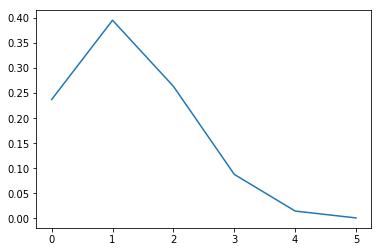

In [2]:
x = [0,1,2,3,4,5]
y = [0.23730,0.39551,0.26367,0.08789,0.01465,0.00098]
plt.plot(x,y)
plt.show()

### Задача 2

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число `N`, такое, что с вероятностью 0.95 пользователь получит не более `N` писем со спамом за текущий день.

В среднем за сутки событие наступает $10$ раз, тогда случайная величина $X$, равная количеству наступлений события за единицу времени, имеет распределение Пуассона.

$$P(X = k) = \dfrac{\lambda^k e^{-\lambda}}{k!}$$

Математическое ожидание и дисперсия распределения Пуассона равны:

$$M(X) = D(X) = \lambda = 10$$

тогда

$$P(X < N) = \displaystyle\sum_{i = 0}^{N} \dfrac{10^{i} e^{-10}}{i!}$$

где

$$P(N) = 0,95$$

Будем высчитывать вероятность $P(X<N)$ в цикле, увеличивая постепенно $N$, до тех пор пока не достигнем заданной вероятности.

In [3]:
p = 0
p_n = 0.95
i = 0
while p <= p_n:
    p += 10**i*math.exp(-10)/math.factorial(i)
    i += 1
print(f'N = {i}')

N = 16


Пользователь получит не более 16 писем со спамом за текущий день.

### Задача 3

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

_Подсказка_. Здесь предстоит немножко покодить.

Пусть событие заключается в попадании в мишень, тогда вероятность попадания при одиночном выстреле $p = 0,01$ и всего пападаний при этом $k >= 6$ с вероятностью $P(X \geq 6) = 0,9$

Тогда

$$P(X \geq 6) = 1 - P(X < 6)$$

Воспользуемся __формулой Бернулли__:
$$P(X = k) = C_n^k p^k (1 - p)^{n - k} = C_5^k (\frac{1}{4})^k (\frac{3}{4})^{5 - k}$$